# Demo for the single chain slide-ring simulations

## Author: Danyang Chen, Duke University

In [1]:
from SCSR import SingleChainSlideRing
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

### Generate a random Gaussian chain with virtual chains

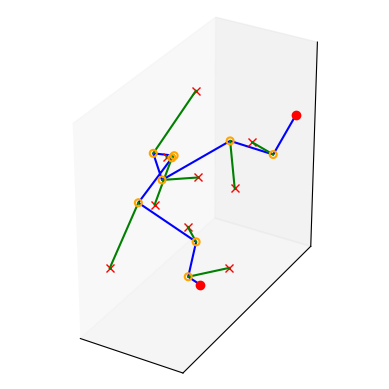

In [67]:
chain = SingleChainSlideRing(20, 10, [15,15,15])
chain.visualize()

### Solve the mean position of rings

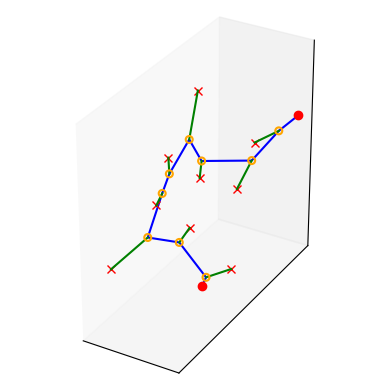

In [68]:
chain.solve()
chain.visualize()

### Equilibrate the chain by allowing the rings to slide

100%|██████████| 10000/10000 [00:03<00:00, 2664.78it/s]


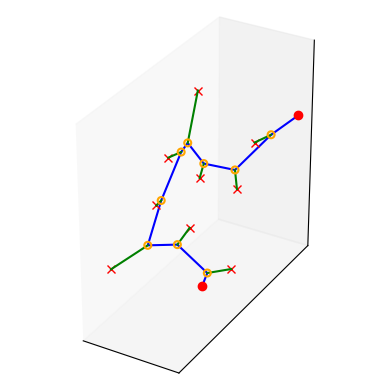

In [69]:
chain.equilibrate(10000)
chain.visualize()

### Affine deformation of the chain and equilibration

100%|██████████| 10000/10000 [00:03<00:00, 2773.66it/s]


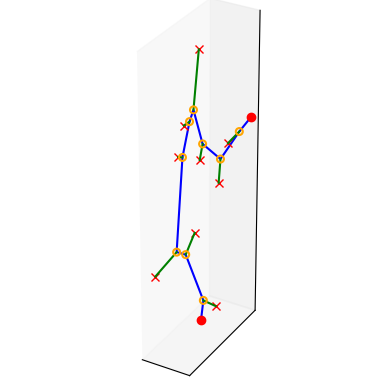

In [70]:
chain.affine_deform([1/np.sqrt(2),1/np.sqrt(2),2])
chain.equilibrate(10000)
chain.visualize()
chain.affine_deform([1,1,1])

### Make the virtual chains weaker in stretching direction and stronger in compressing direction

100%|██████████| 10000/10000 [00:03<00:00, 2854.63it/s]


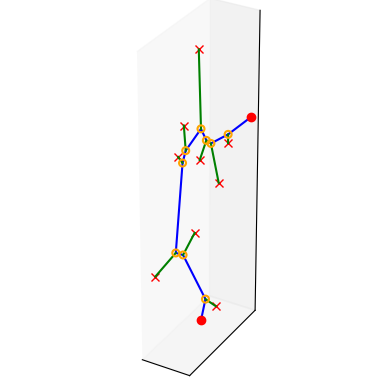

In [71]:
chain.affine_deform([1/np.sqrt(2),1/np.sqrt(2),2])
chain.change_k([15/np.sqrt(2),15/np.sqrt(2),30])
chain.equilibrate(10000)
chain.visualize()
chain.affine_deform([1,1,1])
chain.change_k([15,15,15])

### Mooney Plot for uniaxial stretching

100%|██████████| 100/100 [02:51<00:00,  1.71s/it]


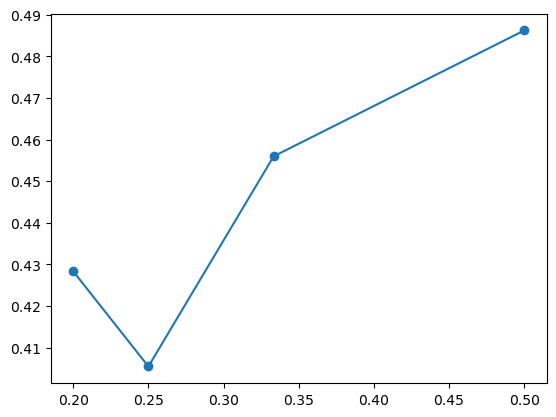

In [8]:
lam_list = [2,3,4,5]
stress_list = []

for lam in lam_list:
    stress = 0
    for i in tqdm(range(100)):
        chain = SingleChainSlideRing(20, 8, [15,15,15])
        chain.affine_deform([1/np.sqrt(lam),1/np.sqrt(lam),lam])
        chain.equilibrate(3000, False)
        stress_tensor = chain.production(3000, False)[0]
        stress += stress_tensor[2] - (stress_tensor[0] + stress_tensor[1])/2
    stress_list.append(stress/100)

lam_list = np.array(lam_list)
stress_list = np.array(stress_list)

plt.plot(1/lam_list, stress_list/(lam_list**2 - 1/lam_list), 'o-')
